** Commence absured amount of imports!** 

In [1]:
%matplotlib notebook

# standard imports 
from __future__ import division 
from __future__ import print_function 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from glob import glob 

In [2]:
# imports for playing with fits files 
from sunpy.net import Fido, attrs
from datetime import datetime, timedelta
import astropy.units as u 
import sunpy.map as smap 
from astropy.coordinates import SkyCoord 
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel

In [3]:
from AIA_tools import * 

In [4]:
fits_files = glob("../data/June_2010_CME_burst/fitsFiles/193/*.fits")

** Check that we can still grab the fits files ** 

In [5]:
print(len(fits_files), fits_files[0])  

100 ../data/June_2010_CME_burst/fitsFiles/193/AIA20100613_053006_0193.fits


In [6]:
data_maps = smap.Map(fits_files, cube=True)

/usr/local/anaconda2/lib/python2.7/site-packages/sunpy/map/sources/sdo.py:48: SunpyDeprecationWarning: Use Matplotlib to load the colormaps
  self.plot_settings['cmap'] = cm.get_cmap(self._get_cmap_name())


** lets try the radial slice function ** 

In [7]:
x_i = 990*u.arcsec 
y_i = -450*u.arcsec 
x_f = 1220*u.arcsec 
y_f = -245*u.arcsec 

radial_slits = [] 
for map_ in data_maps: 
    radial_slits.append(analysis.getRadialSlit(x_i, x_f, y_i, y_f, 200, map_))


** try to plot one of the maps **

In [8]:
fig = plt.figure() 
ax = plt.subplot(projection=data_maps[30])
data_maps[30].plot(axes=ax)
ax.plot_coord(radial_slits[30], color='c', linewidth=0.5)
plt.show() 

<IPython.core.display.Javascript object>

In [9]:
time = data_maps[30].meta['date_obs']
time = datetime.strptime(time, '%Y-%m-%dT%H:%M:%S.%f')


** Let's see if the sumbap function works ** 

In [10]:
subMap = analysis.makeSubmap(data_maps[30], 900, -500, 1200, -200 )

In [11]:
fig = plt.figure() 
ax = plt.subplot(projection = subMap)
subMap.plot(axes=ax) 
ax.plot_coord(radial_slits[30], color='c', linewidth=0.5)

plt.show() 

<IPython.core.display.Javascript object>

** Now let's get the slit intensities ** 

In [12]:
raw_slit_intensities = []
distances = [] 

for i in range(len(radial_slits)): 
    intensity_along_slit, distance = analysis.getRadialSlitIntensity(radial_slits[i], data_maps[i])
    raw_slit_intensities.append(intensity_along_slit)
    distances.append(distance) 

In [13]:
smoothed_intensities = [] 

for intens in raw_slit_intensities: 
        smoothed_intensities.append(analysis.smoothAndNormalizeSlit(intens)) 

In [14]:
plt.figure() 
plt.plot(distances[12], smoothed_intensities[12])
plt.xlabel('Distance [$R_\odot$]')
plt.ylabel('Normalized Intensity')
plt.title('Intensity along radial slit 12')
plt.show() 

<IPython.core.display.Javascript object>

** Now let's stack all of the slit images into a 2-d figure ** 

In [15]:
fig1 = plt.figure(figsize=(20,10)) 
ax1 = plt.subplot(121, projection = subMap)
subMap.plot(cmap=plt.cm.Greys)
ax2 = plt.subplot(122) 
ax2.plot(distances[12], smoothed_intensities[12])
ax2.set_ylim(0, 1.1)
ax2.set_xlim(distances[12][0], distances[12][-1]) 
ax2.set_xlabel('x label') 
ax2.set_title('title')
ax2.set_aspect((np.abs(distances[12][0]-distances[12][-1]))/1.1)

plt.show() 

<IPython.core.display.Javascript object>

In [16]:
times = analysis.getTimes(data_maps)

(200, 100) (100, 200) (100, 200)


<IPython.core.display.Javascript object>


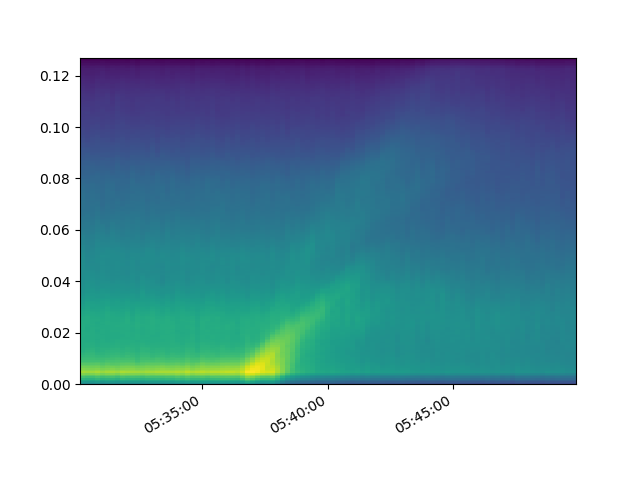

In [19]:
import matplotlib.dates as mdates

shape = np.shape(distances) 
distances = np.asarray(distances) 
assert(np.shape(distances) == np.shape(smoothed_intensities))
ts = [[times[i] for i in range(shape[0])] for j in range(shape[1])]
ts = np.asarray(ts)

print(np.shape(ts), shape, np.shape(smoothed_intensities))

fig, ax = plt.subplots() 
ax.pcolormesh(ts, np.transpose(distances), np.transpose(smoothed_intensities))
fig.autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
plt.show() 

** try to replicate with the function ** 

<IPython.core.display.Javascript object>


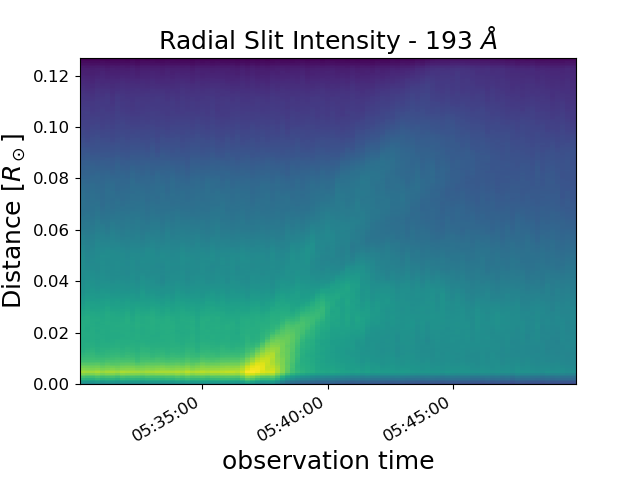

In [33]:
import matplotlib 
fig, ax = plt.subplots()  
analysis.plotRadialStack(times, distances, smoothed_intensities, fig, ax)
ax.set_xlabel("observation time", fontsize=18)
ax.set_ylabel("Distance $[R_\odot]$", fontsize=18)
ax.set_title("Radial Slit Intensity - 193 $\AA$", fontsize=18) 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 






plt.show() 